In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
ground_truth = np.empty_like(data['class'])

for i in range(len(data['class'])):
    if data.ix[i,'class'] == 1:
        ground_truth[i] = -1
    else: ground_truth[i] = 1

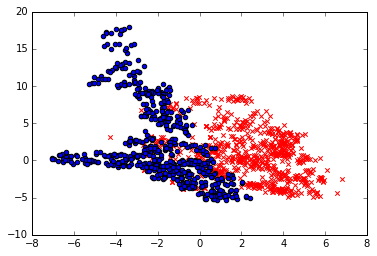

In [27]:
plt.scatter(data.iloc[:,0][data.iloc[:,4]==0], data.iloc[:,2][data.iloc[:,4]==0], marker = 'x', color='r')
plt.scatter(data.iloc[:,0][data.iloc[:,4]==1], data.iloc[:,2][data.iloc[:,4]==1], marker = 'o')

In [31]:
len(data[data['class']==1])/len(data)

0.4446064139941691

In [190]:
isol = IsolationForest(n_estimators=100, max_samples=10000, contamination=0.24,
                       max_features=4, bootstrap=False, random_state=7, n_jobs=-1, verbose=1)
isol.fit(data.iloc[:,:4][data.iloc[:,4]==0])
y = isol.predict(data.iloc[:,:4])
err = (y != ground_truth).sum()
err/len(ground_truth)

C:\Users\k\Anaconda3_64\lib\site-packages\sklearn\ensemble\iforest.py:184: UserWarning: max_samples (10000) is greater than the total number of samples (762). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    2.3s finished


0.13411078717201166

In [191]:
y1 = np.empty_like(y)
for i in range(len(y)):
    if y[i] == -1:
        y1[i] = 1
    else: y1[i] = 0
roc_auc_score(data.iloc[:,4], y1)

0.87910158771137215

In [192]:
recall_score(ground_truth, y, pos_label=-1)

0.99836065573770494

In [193]:
precision_score(ground_truth, y, pos_label=-1)

0.76893939393939392

In [194]:
average_precision_score(data.iloc[:,4], y1)

0.88401445632542996

# XGBoost

In [195]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

C:\Users\k\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [196]:
seed = 7
test_size = 0.33
X = data.iloc[:,:4]
Y = data.iloc[:,4]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=seed) 

In [197]:
model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
                      objective='binary:logistic', nthread=-1, seed=seed)
model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=7, silent=True, subsample=1)

In [198]:
ypred = model.predict(testX)
average_precision_score(testY, ypred)

0.98370201719903405

In [200]:
recall_score(testY, ypred, pos_label=1)

0.98930481283422456

In [201]:
precision_score(testY, ypred, pos_label=1)

0.97368421052631582